In [4]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# Step 2: Load dataset
df = pd.read_csv("F:aug_train.csv")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (19158, 14)
   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4

In [6]:
# Step 3: Check missing values
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [7]:
# Step 4: Handle missing values
df.fillna(df.mode().iloc[0], inplace=True)  # fill categorical with mode, numeric with median

In [8]:
# Step 5: Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

In [9]:
# Step 6: Define features and target
X = df.drop("target", axis=1)   # "target" column = whether employee left
y = df["target"]

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 7: Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df)


Logistic Regression Accuracy: 0.7662
[[2686  194]
 [ 702  250]]
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86      2880
         1.0       0.56      0.26      0.36       952

    accuracy                           0.77      3832
   macro avg       0.68      0.60      0.61      3832
weighted avg       0.74      0.77      0.73      3832


Decision Tree Accuracy: 0.7043
[[2286  594]
 [ 539  413]]
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      2880
         1.0       0.41      0.43      0.42       952

    accuracy                           0.70      3832
   macro avg       0.61      0.61      0.61      3832
weighted avg       0.71      0.70      0.71      3832


Random Forest Accuracy: 0.7657
[[2572  308]
 [ 590  362]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      2880
         1.0       0.54      0.38      0.45       952


C:\Users\nikit\AppData\Local\Temp\ipykernel_1648\2575403405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


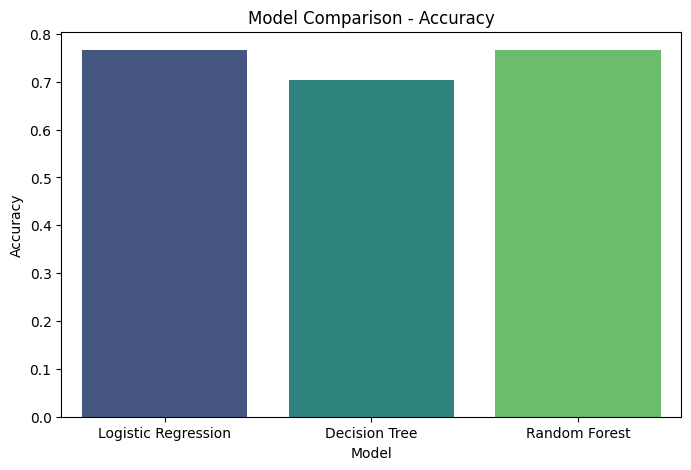

In [11]:
# Step 8: Plot Model Accuracy
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.show()


C:\Users\nikit\AppData\Local\Temp\ipykernel_1648\3456424515.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


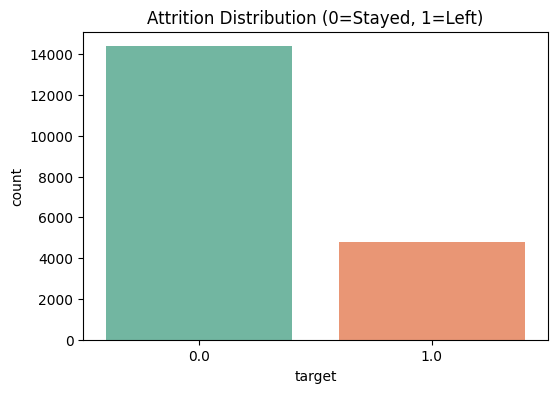

In [12]:
# Step 9: EDA Visualizations
# Attrition distribution
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Attrition Distribution (0=Stayed, 1=Left)")
plt.show()




C:\Users\nikit\AppData\Local\Temp\ipykernel_1648\2955752088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="target", data=df, palette="coolwarm")


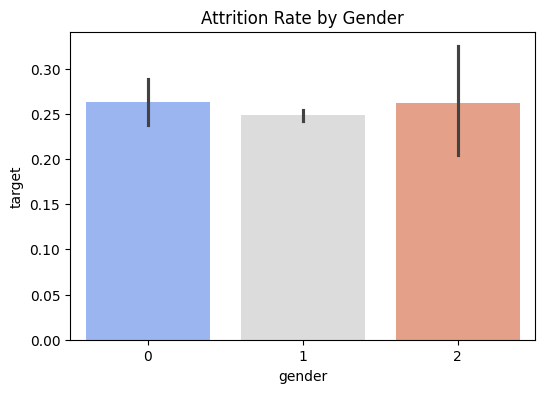

In [13]:
# Attrition by Gender
plt.figure(figsize=(6,4))
sns.barplot(x="gender", y="target", data=df, palette="coolwarm")
plt.title("Attrition Rate by Gender")
plt.show()



Conclusion

Logistic Regression provides a strong baseline (76.6% accuracy) for predicting employee attrition.

It is most useful when the goal is understanding factors behind attrition rather than just prediction accuracy.

However, for better predictive power, advanced models like Random Forest may be preferred since they capture complex patterns.

Logistic Regression in Employee Attrition Prediction

📌 Features of Logistic Regression

Simple & interpretable statistical model.

Predicts probability of employee leaving (Attrition = 1).

Works well with binary classification problems like attrition (0 = stayed, 1 = left).

Provides coefficients to understand feature impact (e.g., how age, department, or experience influence attrition).

✅ Advantages

High interpretability – easy to explain results to HR managers.

Good baseline performance – gives a reference accuracy (here ~76.6%).

Efficient – fast to train, even on large datasets.

Probability outputs – HR can assess risk of attrition (e.g., "employee has 80% chance of leaving").

❌ Disadvantages

Linear assumption – may miss complex relationships in data.

Lower accuracy than advanced models (e.g., Random Forest often performs better).

Sensitive to multicollinearity – highly correlated features can affect coefficients.

Less robust with imbalanced datasets (if very few employees leave compared to stay).